# Neural Network Regularization

## Task G
- Train a neural net and prevent overﬁtting by regularization. 
- You can use any combination of regularizers we saw in class. 
- Use the train and test splits in the data do evaluate the model.


### Import

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

Using TensorFlow backend.


### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Cleaning and Normalization

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
input_shape = (32, 32, 3)

### Build Model

In [5]:
#Creating a sequential model
model = Sequential()

#Convolutional layers
model.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', use_bias = 'true', activation = 'relu', input_shape =(32,32,3) ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add(Dropout(rate=0.5))

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh' ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add(Dropout(rate=0.5))

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu' ) )

#Converting data
model.add(Flatten())  

#Fully connected layers


#model.add(Dense(units=64))
#model.add(BatchNormalization())
#model.add(Activation('relu'))

model.add(Dense(units=64, activation='relu'))

#Output layer
model.add(Dense(units=10, activation='softmax'))

#Finalizing and preparing the model for training
model.compile(
              loss = 'kullback_leibler_divergence',
              #loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Showing the summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

### Train Model

In [6]:
train1 = model.fit(x_train, y_train,
          batch_size=500,
          epochs=20,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
         )

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 107s 2ms/step - loss: 1.9263 - acc: 0.2956 - val_loss: 1.7045 - val_acc: 0.3872
Epoch 2/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.5156 - acc: 0.4532 - val_loss: 1.5654 - val_acc: 0.4296
Epoch 3/20
50000/50000 [==============================] - 98s 2ms/step - loss: 1.3720 - acc: 0.5086 - val_loss: 1.3860 - val_acc: 0.4994
Epoch 4/20
50000/50000 [==============================] - 97s 2ms/step - loss: 1.2746 - acc: 0.5443 - val_loss: 1.5678 - val_acc: 0.4449
Epoch 5/20
50000/50000 [==============================] - 97s 2ms/step - loss: 1.2067 - acc: 0.5700 - val_loss: 1.4861 - val_acc: 0.4867
Epoch 6/20
50000/50000 [==============================] - 100s 2ms/step - loss: 1.1477 - acc: 0.5909 - val_loss: 1.4603 - val_acc: 0.4884
Epoch 7/20
50000/50000 [==============================] - 98s 2ms/step - loss

In [7]:
train2 = model.fit(x_train, y_train,
          batch_size=250,
          epochs=5,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.8353 - acc: 0.7064 - val_loss: 1.0167 - val_acc: 0.6574
Epoch 2/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.8088 - acc: 0.7163 - val_loss: 1.0671 - val_acc: 0.6437
Epoch 3/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.7869 - acc: 0.7223 - val_loss: 0.8978 - val_acc: 0.6969
Epoch 4/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.7632 - acc: 0.7316 - val_loss: 0.9439 - val_acc: 0.6879
Epoch 5/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.7478 - acc: 0.7371 - val_loss: 1.0646 - val_acc: 0.6582
Epoch 6/10
50000/50000 [==============================] - 109s 2ms/step - loss: 0.7396 - acc: 0.7420 - val_loss: 1.0819 - val_acc: 0.6477
Epoch 7/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.7228 - acc: 0.7481 - val_loss: 0.9353 - 

In [8]:
train3 = model.fit(x_train, y_train,
          batch_size=1028,
          epochs=7,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 96s 2ms/step - loss: 0.6338 - acc: 0.7758 - val_loss: 0.8956 - val_acc: 0.7031
Epoch 2/5
50000/50000 [==============================] - 93s 2ms/step - loss: 0.6135 - acc: 0.7844 - val_loss: 0.9272 - val_acc: 0.7009
Epoch 3/5
50000/50000 [==============================] - 95s 2ms/step - loss: 0.6026 - acc: 0.7884 - val_loss: 0.9548 - val_acc: 0.6953
Epoch 4/5
50000/50000 [==============================] - 95s 2ms/step - loss: 0.6057 - acc: 0.7879 - val_loss: 0.9590 - val_acc: 0.6926
Epoch 5/5
50000/50000 [==============================] - 93s 2ms/step - loss: 0.5988 - acc: 0.7892 - val_loss: 0.9230 - val_acc: 0.6996


### Test Model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9230487188339234
Test accuracy: 0.6996


### Results

In [10]:
a1 = train1.history['acc'][-1]
v1 = train1.history['val_acc'][-1]
a2 = train2.history['acc'][-1]
v2 = train2.history['val_acc'][-1]
a3 = train3.history['acc'][-1]
v3 = train3.history['val_acc'][-1]

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1. train', '2. train', '3.train']
accuracy = [a1,a2,a3]
val_accuracy = [v1,v2,v3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by training and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
train_loss = np.concatenate((train1.history['loss'], train2.history['loss'], train3.history['loss']))
val_loss = np.concatenate((train1.history['val_loss'],train2.history['val_loss'],train3.history['val_loss']))
train_acc = np.concatenate((train1.history['acc'], train2.history['acc'], train3.history['acc']))
val_acc = np.concatenate((train1.history['val_acc'],train2.history['val_acc'],train3.history['val_acc']))

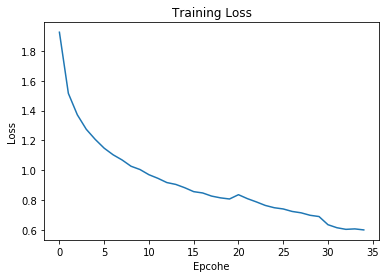

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Epcohe")
plt.ylabel("Loss")
plt.show()

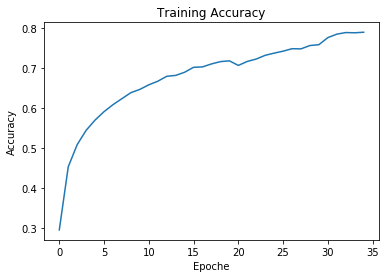

In [14]:
plt.plot(train_acc)
plt.title("Training Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

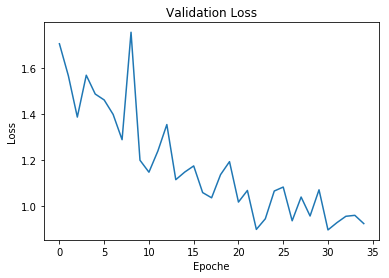

In [15]:
plt.plot(val_loss)
plt.title("Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.show()

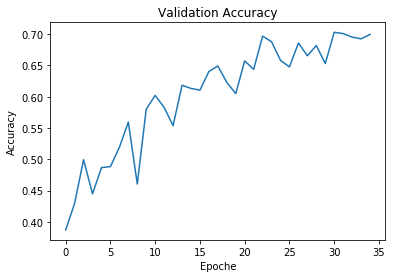

In [16]:
plt.plot(val_acc)
plt.title("Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

This is our result

We use 
Dropout
Batch Nomalization -> hat nicht gut funktioniert also wieder rausgemacht
Validation Data? 
Convolution

Epochen angepasst